# MNIST Classification using different classifiers(scikit-learn)

In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [2]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([ 0.,  0.,  0., ...,  9.,  9.,  9.])}

In [3]:
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [4]:
y.shape

(70000,)

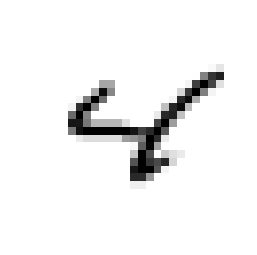

In [5]:
random_digit = X[28000]
random_digit_image=random_digit.reshape(28, 28)
plt.imshow(random_digit_image, cmap = plt.cm.binary,
           interpolation="nearest")
plt.axis("off")
plt.show()

In [6]:
y[28000]

4.0

In [7]:
# dataset is divided into train,test set already...train set-first 60000,test set-next 10000
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [8]:
# shuffling for similar cross validation folds
shuffle = np.random.permutation(60000)
X_train,y_train = X_train[shuffle],y_train[shuffle]

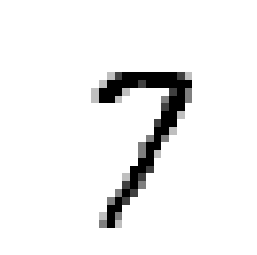

In [9]:
# found instance of 7 to verify with SGDClassifier
another_digit = X[48000]
another_digit_image=another_digit.reshape(28, 28)
plt.imshow(another_digit_image, cmap = plt.cm.binary,
           interpolation="nearest")
plt.axis("off")
plt.show()

In [10]:
y[48000]

7.0

## Binary Classifer

In [11]:
# Just detecting/classifying whether 7 or not 7
y_train_7 = (y_train == 7)
y_test_7 = (y_test == 7)

In [12]:
from sklearn.linear_model import SGDClassifier

sgd_clf=SGDClassifier()
sgd_clf.fit(X_train,y_train_7)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=5, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

In [13]:
sgd_clf.predict([another_digit]) # since another digit stored 7,predicts correctly 

array([ True], dtype=bool)

In [14]:
sgd_clf.predict([random_digit]) # since random digit stored 4,predicts correctly

array([False], dtype=bool)

In [15]:
# measurig accuracy using cross validation
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_7, cv=3, scoring="accuracy")

array([ 0.97880106,  0.98085   ,  0.97789889])

In [16]:
from sklearn.model_selection import cross_val_predict
y_train_predict = cross_val_predict(sgd_clf, X_train, y_train_7, cv=3)

In [17]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_7, y_train_predict)

array([[53129,   606],
       [  687,  5578]], dtype=int64)

In [18]:
from sklearn.metrics import precision_score,recall_score
precision_score(y_train_7, y_train_predict)

0.90200517464424323

In [19]:
recall_score(y_train_7, y_train_predict)

0.89034317637669591

In [20]:
from sklearn.metrics import f1_score
f1_score(y_train_7, y_train_predict)

0.89613623584223634

## Random Forest Classifier

In [21]:
from sklearn.ensemble import RandomForestClassifier
ranfor = RandomForestClassifier()
ranfor.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [22]:
y_pred = ranfor.predict(X_test)
ranfor.score(X_test, y_test)

0.9476

In [23]:
ranfor.predict([random_digit])   # predicting correctly

array([ 4.])

In [24]:
ranfor.predict([another_digit])  # predicting correctly

array([ 7.])

In [25]:
ranfor.predict_proba([another_digit])  # probability 1 for 7

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.]])

In [26]:
ranfor.predict_proba([random_digit])  # probability 0.9 for 4

array([[ 0. ,  0. ,  0. ,  0. ,  0.9,  0. ,  0.1,  0. ,  0. ,  0. ]])

## Error Analysis

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(ranfor, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([ 0.94436113,  0.939997  ,  0.939991  ])

In [28]:
y_train_pred = cross_val_predict(ranfor, X_train_scaled, y_train, cv=3)
conmx = confusion_matrix(y_train, y_train_pred)
conmx

array([[5805,    2,   16,    9,    1,   21,   30,    2,   32,    5],
       [   1, 6636,   33,   16,   17,    7,    6,   13,   12,    1],
       [  46,   30, 5630,   57,   34,   11,   28,   47,   61,   14],
       [  22,   18,  125, 5646,   10,  134,   13,   52,   81,   30],
       [  23,   12,   32,    9, 5532,    9,   34,   17,   24,  150],
       [  48,   14,   26,  180,   30, 4978,   55,    9,   54,   27],
       [  50,   14,   24,    6,   29,   76, 5699,    0,   18,    2],
       [  12,   40,   90,   23,   71,    1,    0, 5907,   13,  108],
       [  37,   52,   90,  138,   58,  108,   39,   16, 5235,   78],
       [  41,   15,   28,   83,  163,   40,   11,   96,   60, 5412]], dtype=int64)

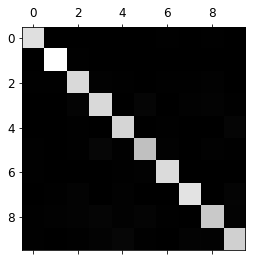

In [29]:
plt.matshow(conmx, cmap=plt.cm.gray)
plt.show()

## Multilabel Classification

In [30]:
# Using KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(weights = 'uniform')
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [33]:
knn_clf.predict([another_digit])

array([ 7.])

In [34]:
knn_clf.score(X_test, y_test)

0.96879999999999999

In [35]:
knn_predictions = knn_clf.predict(X_test)

In [36]:
from sklearn.metrics import classification_report
print("EVALUATION ON TESTING DATA")
print(classification_report(y_test, knn_predictions))

EVALUATION ON TESTING DATA
             precision    recall  f1-score   support

        0.0       0.96      0.99      0.98       980
        1.0       0.95      1.00      0.98      1135
        2.0       0.98      0.96      0.97      1032
        3.0       0.96      0.97      0.97      1010
        4.0       0.98      0.96      0.97       982
        5.0       0.97      0.97      0.97       892
        6.0       0.98      0.99      0.98       958
        7.0       0.96      0.96      0.96      1028
        8.0       0.99      0.94      0.96       974
        9.0       0.96      0.95      0.95      1009

avg / total       0.97      0.97      0.97     10000



In [37]:
knn_clf.predict([random_digit])

array([ 4.])